In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import re
import html
warnings.filterwarnings('ignore')
sns.set_theme(context="notebook")

In [2]:
pd.set_option("display.max_colwidth", None)

In [3]:
df = pd.read_csv("development.csv")

In [4]:
df.shape

(79997, 7)

In [5]:
df.head(5)

,Id,source,title,article,page_rank,timestamp,label
0,0,AllAfrica.com,OPEC Boosts Nigeria&#39;s Oil Revenue By .82m Bpd,"THE Organisation of Petroleum Exporting Countries (OPEC) is hiking its official output by one million barrels per day effective November with Nigeria getting 82,000 barrels per day or 8.2 per cent of the new quota.",5,2004-09-16 22:39:53,5
1,1,Xinhua,Yearender: Mideast peace roadmap reaches dead-end in 2004,"Looking back at the major events that took place in the Middle East in 2004, the death of veteran Palestinian leader Yasser Arafat is undoubtedly a world-shaker.",5,2004-12-17 19:01:14,0
2,2,Yahoo,Battleground Dispatches for Oct. 5 \\n (CQPolitics.com)\\n,"CQPolitics.com - Here are today's Battleground Dispatches Ã¢ÂÂ a roundup of what is going on right now in the year's hottest races, based on reports from local and national media.",5,2006-10-05 18:42:29,0
3,3,BBC,Air best to resuscitate newborns,"Air rather than oxygen should be used to resuscitate newborn babies and may even save lives, research suggests.",5,0000-00-00 00:00:00,0
4,4,Yahoo,High tech German train crash kills at least one \\n (Reuters)\\n,"<p><a href=""http://us.rd.yahoo.com/dailynews/rss/europe/*http://news.yahoo.com/s/nm/20060922/wl_nm/transport_germany_accident_dc""><img src=""http://d.yimg.com/us.yimg.com/p/rids/20060922/i/r83709231.jpg?x=47&y=130&sig=dF38yH9MhxP9zBLqrj3SMw--"" align=""left"" height=""130"" width=""47"" alt=""An aerial view shows the crash site of a Transrapid high-speed train in the northern German region of Emsland near the town of Lathen, September 22, 2006. REUTERS/Bodo Marks"" border=""0"" /></a>Reuters - A high tech German train \\ncarrying 29 people smashed into a maintenance vehicle on a \\ntrial run in northern Germany on Friday, killing at least one \\nand trapping 10 more in the wreckage, a local official said.</p><br clear=""all""/>",5,2006-09-22 17:28:57,0


In [6]:
df.shape[0] == df["Id"].nunique()
# We can drop id column

True

In [7]:
df.isna().sum()

Id           0
source       0
title        1
article      1
page_rank    0
timestamp    0
label        0
dtype: int64

In [8]:
df.drop(columns=["Id"], inplace=True)

In [9]:
#we will handle article and title missing malue on eda

# EDA

In [10]:
df.head(5)

,source,title,article,page_rank,timestamp,label
0,AllAfrica.com,OPEC Boosts Nigeria&#39;s Oil Revenue By .82m Bpd,"THE Organisation of Petroleum Exporting Countries (OPEC) is hiking its official output by one million barrels per day effective November with Nigeria getting 82,000 barrels per day or 8.2 per cent of the new quota.",5,2004-09-16 22:39:53,5
1,Xinhua,Yearender: Mideast peace roadmap reaches dead-end in 2004,"Looking back at the major events that took place in the Middle East in 2004, the death of veteran Palestinian leader Yasser Arafat is undoubtedly a world-shaker.",5,2004-12-17 19:01:14,0
2,Yahoo,Battleground Dispatches for Oct. 5 \\n (CQPolitics.com)\\n,"CQPolitics.com - Here are today's Battleground Dispatches Ã¢ÂÂ a roundup of what is going on right now in the year's hottest races, based on reports from local and national media.",5,2006-10-05 18:42:29,0
3,BBC,Air best to resuscitate newborns,"Air rather than oxygen should be used to resuscitate newborn babies and may even save lives, research suggests.",5,0000-00-00 00:00:00,0
4,Yahoo,High tech German train crash kills at least one \\n (Reuters)\\n,"<p><a href=""http://us.rd.yahoo.com/dailynews/rss/europe/*http://news.yahoo.com/s/nm/20060922/wl_nm/transport_germany_accident_dc""><img src=""http://d.yimg.com/us.yimg.com/p/rids/20060922/i/r83709231.jpg?x=47&y=130&sig=dF38yH9MhxP9zBLqrj3SMw--"" align=""left"" height=""130"" width=""47"" alt=""An aerial view shows the crash site of a Transrapid high-speed train in the northern German region of Emsland near the town of Lathen, September 22, 2006. REUTERS/Bodo Marks"" border=""0"" /></a>Reuters - A high tech German train \\ncarrying 29 people smashed into a maintenance vehicle on a \\ntrial run in northern Germany on Friday, killing at least one \\nand trapping 10 more in the wreckage, a local official said.</p><br clear=""all""/>",5,2006-09-22 17:28:57,0


In [11]:
article_map = {0: "International News", 1: "Business", 2: "Technology", 3: "Entertainment", 4: "Sports", 5: "General News", 6: "Health"}

In [12]:
df["label"].map(article_map).value_counts()

label
International News    23542
General News          13053
Technology            11161
Business              10588
Entertainment          9977
Sports                 8574
Health                 3102
Name: count, dtype: int64

In [13]:
#Dataset seems pretty balanced, considering that health and sport articles are not as popoular as news and business 
df["label"].isna().sum()

np.int64(0)

## PageRank evaluation

In [14]:
df["page_rank"].value_counts()

page_rank
5    73891
4     3692
3     2371
2       43
Name: count, dtype: int64

In [15]:
#Considering the dataset of almost 80k rows, it seems like a considerable number of article has pagerank equal to 5

#before applying preprocessing in the text. let's see if there is some interesting information on pagerank

In [16]:
for i in range(7):
    
    print(article_map[i], df[df["label"]==i]["page_rank"].unique(), df[df["label"]==i]["label"].count())

International News [5] 23542
Business [5 4] 10588
Technology [3 5 4 2] 11161
Entertainment [5 4] 9977
Sports [5 4] 8574
General News [5] 13053
Health [5] 3102


In [17]:
df["article_type"] = df["label"].map(article_map)

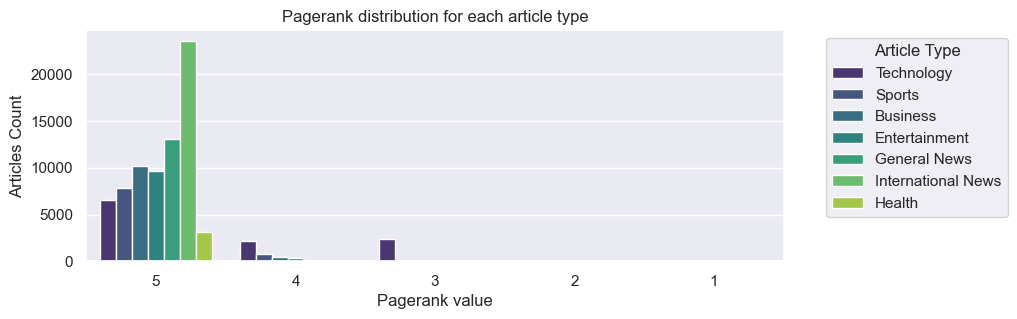

In [18]:
plt.figure(figsize=(9,3))

sns.countplot(data=df, x='page_rank', hue='article_type', palette='viridis', order=[5,4,3,2,1])

plt.title('Pagerank distribution for each article type')
plt.xlabel('Pagerank value')
plt.ylabel('Articles Count')
plt.legend(title='Article Type', bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [19]:
#seems like pagerank feature doesn't give us a lot of information about the article type, we can try to test the model with and without this feature later
#(distribution of pagerank basically follows distribution of labels)

## Source evaluation

In [20]:
## Let's see how the top 3 sources are distributed for each article type, this could give us some insights and information

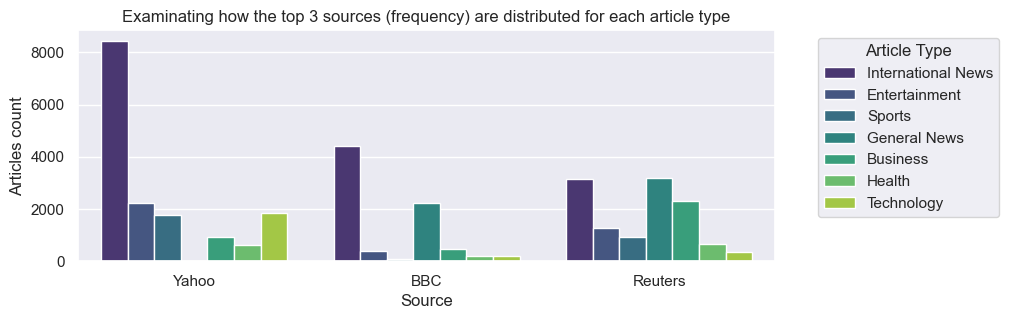

In [21]:

top3_sources = (
    df["source"]
    .value_counts()
    .nlargest(3)
    .index
)

plt.figure(figsize=(9,3))

sns.countplot(
    data=df[df["source"].isin(top3_sources)], x="source", hue="article_type", palette="viridis",
)

plt.title(f"Examinating how the top 3 sources (frequency) are distributed for each article type")
plt.legend(title='Article Type', bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xlabel("Source")
plt.ylabel("Articles count")
plt.show()

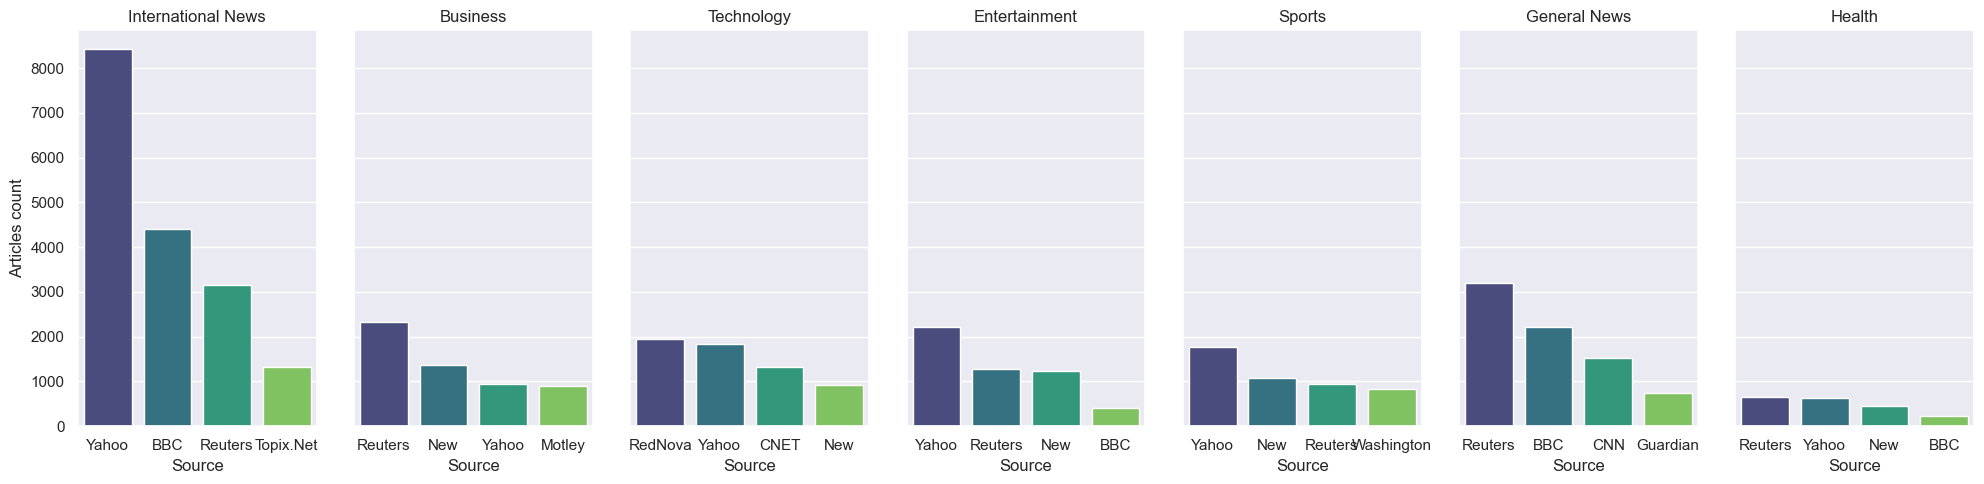

In [22]:

fig, axes = plt.subplots(1, 7, figsize=(20, 5), sharey=True)

top_sources_global = []

for i, label in enumerate(article_map.keys()):
    df_label = df[df["label"] == label]
    top_sources = df_label["source"].value_counts().nlargest(4).index
    top_sources_global.extend(top_sources)
    sns.countplot(
        data=df_label[df_label["source"].isin(top_sources)],
        x="source",
        order=top_sources,
        ax=axes[i],
        palette="viridis"
    )
    axes[i].set_title(article_map[label])
    axes[i].set_xlabel("Source")
    if i == 0:
        axes[i].set_ylabel("Articles count")
    else:
        axes[i].set_ylabel("")

plt.tight_layout()
plt.show()

In [23]:
top_sources = np.unique(top_sources_global).tolist()
top_sources

['BBC',
 'CNET',
 'CNN',
 'Guardian',
 'Motley',
 'New',
 'RedNova',
 'Reuters',
 'Topix.Net',
 'Washington',
 'Yahoo']

In [24]:
for label in df["label"].unique():
    print(article_map[label], "\n")
    print(df[df["label"] == label]["source"].value_counts().head(40))
    print("\n\n")

General News 

source
Reuters            3194
BBC                2220
CNN                1526
Guardian            735
Washington          603
News                395
Time                359
New                 200
Newsweek            170
ABC                 147
Xinhua              125
Boston               88
Bloomberg            87
Seattle              85
Voice                85
San                  84
International        60
Independent          60
CBS                  55
USA                  54
Forbes               52
Times                46
Houston              45
Scotsman             42
CBC                  39
Channel              38
Telegraph.co.uk      38
Newsday              37
\N                   37
\                    34
Australian           34
Daily                30
Christian            30
Canada.com           29
NPR                  29
MSNBC                27
Toronto              24
Melbourne            24
London               23
Turkish              23
Name: count, dtype

In [25]:
#we can try to create new features based on how source's are "connected" to label (article topic)

#there are a lots of "local" journal (cities name), general news and itnernational news have similiar sources, while there are some
#distctintive sources for sport, business, health

#reuters, cnn, fox_news,  etc will probably have a global_institutional print


## TIMESTAMP




In [26]:
for label in df["label"].unique():
 print(label, "\n")
 display(df[df["label"]==label][["timestamp", "source"]].head(10))

 #bin discretizer(?)

5 



,timestamp,source
0,2004-09-16 22:39:53,AllAfrica.com
9,0000-00-00 00:00:00,ABC
11,0000-00-00 00:00:00,Glasgow
22,0000-00-00 00:00:00,Reuters
27,2007-06-12 04:51:11,Reuters
29,2004-12-14 04:36:48,Telegraph.co.uk
45,2006-10-07 22:12:02,BBC
56,0000-00-00 00:00:00,San
77,0000-00-00 00:00:00,BBC
78,2004-09-10 14:36:46,Aljazeerah.info


0 



,timestamp,source
1,2004-12-17 19:01:14,Xinhua
2,2006-10-05 18:42:29,Yahoo
3,0000-00-00 00:00:00,BBC
4,2006-09-22 17:28:57,Yahoo
7,2007-10-27 15:42:18,Yahoo
8,2008-01-17 06:13:41,Yahoo
10,2007-12-16 22:09:23,BBC
20,2007-02-10 14:55:46,Reuters
28,2007-09-24 22:42:03,Topix.Net
30,0000-00-00 00:00:00,Yahoo


3 



,timestamp,source
5,2008-01-24 10:32:48,Syfy.com
6,0000-00-00 00:00:00,Yahoo
15,0000-00-00 00:00:00,New
18,2007-06-06 00:58:37,Yahoo
19,2004-09-22 17:52:53,Arizona
24,0000-00-00 00:00:00,Philippine
32,2004-09-14 03:32:45,Washington
35,0000-00-00 00:00:00,Yahoo
40,2007-06-25 17:32:22,Yahoo
41,2004-11-05 22:04:07,Yahoo


2 



,timestamp,source
12,2007-02-03 01:49:24,RedNova
13,0000-00-00 00:00:00,CNET
14,2007-02-28 20:46:01,RedNova
37,2007-06-20 15:23:20,CNET
42,2007-06-28 01:36:14,Register
44,0000-00-00 00:00:00,NEWS.com.au
57,0000-00-00 00:00:00,Florida
58,0000-00-00 00:00:00,Electronic
65,2007-09-19 04:41:40,PCWorld
67,2008-02-11 19:45:16,PCWorld


4 



,timestamp,source
16,0000-00-00 00:00:00,Yahoo
17,0000-00-00 00:00:00,Sports
21,2006-11-27 06:07:32,Reuters
23,2007-10-29 20:06:59,Washington
26,2004-11-29 22:39:56,Pittsburgh
39,2008-02-02 09:22:07,Yahoo
54,0000-00-00 00:00:00,New
69,2004-11-04 19:56:57,CBS
81,0000-00-00 00:00:00,Lex
95,0000-00-00 00:00:00,Yahoo


1 



,timestamp,source
25,0000-00-00 00:00:00,Washington
46,2008-01-30 20:06:13,Reuters
49,0000-00-00 00:00:00,Yahoo
53,2006-09-24 01:11:59,New
64,0000-00-00 00:00:00,DMasia.com
74,2008-02-15 05:40:33,New
86,2007-02-05 19:22:08,International
88,2007-08-25 06:48:32,Reuters
108,0000-00-00 00:00:00,Reuters
112,0000-00-00 00:00:00,eWeek


6 



,timestamp,source
51,2007-02-16 12:58:20,Yahoo
55,2006-09-12 11:53:47,BBC
70,2008-01-11 08:02:43,New
76,2008-01-16 08:35:25,New
93,0000-00-00 00:00:00,KPIX-TV
100,0000-00-00 00:00:00,Hampton
125,2004-12-17 23:25:50,Reuters
133,0000-00-00 00:00:00,Yahoo
163,2004-10-07 21:20:36,BBC
171,2007-08-31 19:54:59,Yahoo


In [27]:
df["timestamp"].value_counts()

timestamp
0000-00-00 00:00:00    27750
2006-09-24 18:59:34        2
2007-03-05 19:48:41        2
2006-09-20 01:26:43        2
2007-07-24 01:27:26        2
                       ...  
2005-02-11 04:34:15        1
2007-12-15 13:19:48        1
2007-06-25 07:08:21        1
2008-01-23 11:39:35        1
2004-12-03 18:45:39        1
Name: count, Length: 52183, dtype: int64

In [28]:
#almost 30k row with placerholder/missing value, and all the others date appears only 1 or 2 time. 


#here the main goal is to see if there are some pattern and cycle in the season for topic

#ex: politcs election in a certain month/period,  sport tournament ina  certain month/period or even yearly period
#because voucabolary can change from one year to another

<Figure size 1400x800 with 0 Axes>

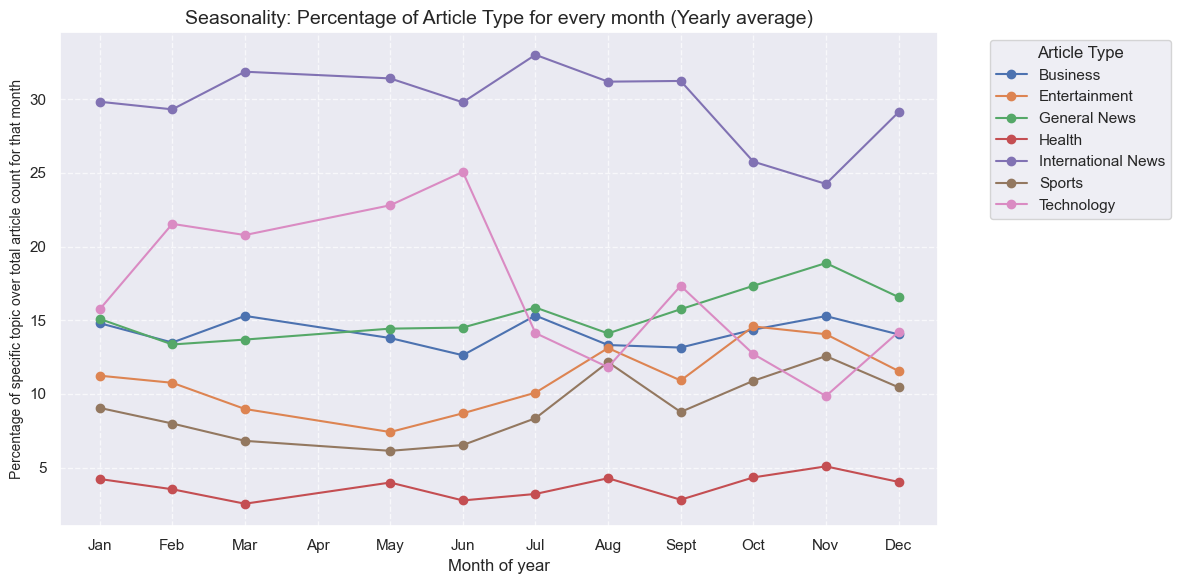

In [29]:

df_temp = df.copy()

df_temp['dt_clean'] = pd.to_datetime(df_temp['timestamp'], errors='coerce')

df_temp['month'] = df_temp['dt_clean'].dt.month

df_plot = df_temp.dropna(subset=['month'])
df_plot['month'] = df_plot['month'].astype(int)


plt.figure(figsize=(14, 8))


ct = pd.crosstab(df_plot['month'], df_plot['article_type'], normalize='index') * 100

# Plotting
ct.plot(kind='line', marker='o', figsize=(12, 6))

plt.title('Seasonality: Percentage of Article Type for every month (Yearly average)', fontsize=14)
plt.xlabel('Month of year', fontsize=12)
plt.ylabel('Percentage of specific topic over total article count for that month', fontsize=10)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Article Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [30]:
# The exploratory analysis reveals significant monthly seasonality across different article categories.
#  Specifically, topics such as Technology and International News exhibit distinct peaks
#  (e.g., Technology peaking in June at#  ~25% compared to its 15% baseline), suggesting that the time of
#  year could be a nice predictor for certain topics.

## ARTICLE AND TITLE EXPLORING

In [31]:
df[["article", "title"]].isna().sum()

article    1
title      1
dtype: int64

In [32]:
print("Number of null articles not catalogated as nan: ", (df["article"]=="").sum())
print("Number of null articles not catalogated as nan: ", (df["title"]=="").sum())


Number of null articles not catalogated as nan:  0
Number of null articles not catalogated as nan:  0


In [33]:
display(df[df["title"].isna()])
display(df[df["article"].isna()])

,source,title,article,page_rank,timestamp,label,article_type
26038,Forbes,NaN,\N,5,2004-11-19 23:47:53,1,Business


,source,title,article,page_rank,timestamp,label,article_type
53004,CNET,"20,000 more H1-B visas",NaN,3,0000-00-00 00:00:00,2,Technology


In [34]:
#we can do that considering that they are just 2 rows and then we will do is_null and is_adv features engineering

df = df[~df['title'].isna()]
df = df[~df["article"].isna()]

### seems like "\N" is an indicator of null article

In [35]:
print("Number of \\N article: ", (df["article"]=="\\N").sum())
print("Number of \\N title: ", (df["title"]=="\\N").sum())

#we will create a feature to indicate that an article is null (\\N)

Number of \N article:  1873
Number of \N title:  0


In [36]:
df[df["article"]=="\\N"][["source", "title", "article_type"]]

#there is information in title for \\n article
#we will fix that in preprocessing

,source,title,article_type
86,International,The Workplace: It&#x27;s called mobbing,Business
91,CNN,Iraqi interim president: Insurgents gone in a year,General News
127,CNN,Tsunami doctors badly hit in Indonesia,General News
151,International,Spotlight: Recruiting the recruiter,Business
152,International,Gabonese hope for windfall as Chinese develop iron ore deposit,Business
...,...,...,...
79739,CNN,U.S.: 109 insurgents killed,General News
79792,Forbes,Complete Coverage: Leadership,Business
79839,CNN,Hong Kong Democrats demand recount,General News
79947,Washington,Campaign for Change Resonates at the Polls,General News


### The goal of this section is to see if there is some noise in the data, if there are only unique title articles and in general to see how to perform a first attempt of text cleaning

In [37]:
df["title"].value_counts()

title
 WORLD IN BRIEF                                                 29
ADV: Distance Learning Directory - Online Degrees               23
ADV: Health Insurance for the Self-Employed!                    22
ADV: $150,000 Mortgage for Under $690/Month                     21
European press review                                           18
                                                                ..
Russian MPs launch hunger strike                                 1
Strahan Has Decided When Heâll Decide                          1
Alinghi Holds On to Americaâs Cup                              1
Deja vu all over again: Sony uses rootkits, charges F-Secure     1
Air best to resuscitate newborns                                 1
Name: count, Length: 75782, dtype: int64

### as we tough there are some repetead title

In [38]:
mask_title = (df["title"].value_counts().values > 1)
(df["title"].value_counts().index)[mask_title]
#3450 repeated titles

Index([' WORLD IN BRIEF ', 'ADV: Distance Learning Directory - Online Degrees',
       'ADV: Health Insurance for the Self-Employed!',
       'ADV: $150,000 Mortgage for Under $690/Month', 'European press review',
       ' NATION IN BRIEF ', 'Reporters on the Job',
       'The Nation's Weather \\n    (AP)\\n',
       'ADV: $175,000 Mortgage for Under $730/Month', 'ADV: Free Career Test',
       ...
       'Iconic 'Gherkin' sold for Â£600m', 'How the runs scored',
       'GM, Daimler to cooperate on hybrids',
       'Industrial Output Growth Nearly Stalls', 'Regime Change in Sudan',
       'Former Novell head Messman quits board early',
       'Drug Firms Issue Memos on Michael Moore',
       'These Stocks Beat Paid-Search Stocks', 'Ding Dong, the Deal is Dead',
       'Ramos - why I quit Sevilla for Premiership Spurs \\n    (AFP)\\n'],
      dtype='object', name='title', length=3450)

### Seems like that some titles are just adv that is obviusly considerable as noise (the one starting with ADV:) but there are also other titles that seem real and solid, but repeated more than 1 time, so we have to make sure that this is a repetead article

In [39]:
#taking one of the repetead title
display(df[df["title"]=='Manning seals legacy with Super Bowl win'][["article", "label"]])
df[df["title"]=='Manning seals legacy with Super Bowl win']["article"].nunique()

,article,label
2268,MIAMI (Reuters) - Peyton Manning added the missing ingredient to his Hall of Fame credentials by leading the Indianapolis Colts to a 29-17 victory over the Chicago Bears in Super Bowl XLI on Sunday.,4
3841,MIAMI (Reuters) - Peyton Manning added the missing ingredient to his Hall of Fame credentials by leading the Indianapolis Colts to a 29-17 victory over the Chicago Bears in Super Bowl XLI on Sunday.,4
49068,MIAMI (Reuters) - Peyton Manning added the missing ingredient to his Hall of Fame credentials by leading the Indianapolis Colts to a 29-17 victory over the Chicago Bears in Super Bowl XLI on Sunday.,4
50236,MIAMI (Reuters) - Peyton Manning added the missing ingredient to his Hall of Fame credentials by leading the Indianapolis Colts to a 29-17 victory over the Chicago Bears in Super Bowl XLI on Sunday.,4
69801,MIAMI (Reuters) - Peyton Manning added the missing ingredient to his Hall of Fame credentials by leading the Indianapolis Colts to a 29-17 victory over the Chicago Bears in Super Bowl XLI on Sunday.,4
79566,MIAMI (Reuters) - Peyton Manning added the missing ingredient to his Hall of Fame credentials by leading the Indianapolis Colts to a 29-17 victory over the Chicago Bears in Super Bowl XLI on Sunday.,4


1

### As tought, we got the same article for a title which is repeated 6 times

###  Now let's do it generally (printing number of unique values for repetead titles)

In [40]:
mask_title = df["title"].value_counts().values > 4
for title in (df["title"].value_counts().index)[mask_title]:
    print(f" number of unique article for title {title} is {(df[df["title"]==title])["article"].nunique()}")

 number of unique article for title  WORLD IN BRIEF  is 29
 number of unique article for title ADV: Distance Learning Directory - Online Degrees is 1
 number of unique article for title ADV: Health Insurance for the Self-Employed! is 1
 number of unique article for title ADV: $150,000 Mortgage for Under $690/Month is 1
 number of unique article for title European press review is 18
 number of unique article for title  NATION IN BRIEF  is 18
 number of unique article for title Reporters on the Job is 12
 number of unique article for title The Nation's Weather \
    (AP)\
 is 16
 number of unique article for title ADV: $175,000 Mortgage for Under $730/Month is 1
 number of unique article for title ADV: Free Career Test is 1
 number of unique article for title ADV: Refinance Rates Just Got Lower is 3
 number of unique article for title WORLD IN BRIEF is 12
 number of unique article for title ADV: Try Currency Trading Risk-Free 30 Days is 1
 number of unique article for title Weather aroun

In [41]:
#Taking for example a random article ( number of unique article for title Noteworthy new albums  is 5)
df[df["title"]=="Noteworthy new albums "]["article"]

9519     The White Stripes rip through the raucous new "Icky Thump," while Bon Jovi and Toby Keith take the long road to Nashville.<br style="clear: both;"/>\\n  <img alt="" style="border: 0;" border="0" src="http://www.pheedo.com/img.phdo?i=abe52bd3036251a56f3a8734107ee25f"/>\\n<p><a href="http://rss.csmonitor.com/~a/feeds/arts?a=874Tdj"><img src="http://rss.csmonitor.com/~a/feeds/arts?i=874Tdj" border="0"></img></a></p><div class="feedflare">\\n<a href="http://rss.csmonitor.com/~f/feeds/arts?a=m6GqTXFd"><img src="http://rss.csmonitor.com/~f/feeds/arts?i=m6GqTXFd" border="0"></img></a> <a href="http://rss.csmonitor.com/~f/feeds/arts?a=mu3rEKS8"><img src="http://rss.csmonitor.com/~f/feeds/arts?i=mu3rEKS8" border="0"></img></a> <a href="http://rss.csmonitor.com/~f/feeds/arts?a=LYMfAYQw"><img src="http://rss.csmonitor.com/~f/feeds/arts?i=LYMfAYQw" border="0"></img></a>\\n <a href="http://feeds.feedburner.com/~f/feeds/arts?a=nlEJm4tw"><img src="http://feeds.feedburner.com/~f/feeds/arts?i=

In [42]:
df[df["title"]=="Noteworthy new albums "]["article"].iloc[0]



#should be 5 different articles but they are not. Here we're just checking the first one of five


'The White Stripes rip through the raucous new "Icky Thump," while Bon Jovi and Toby Keith take the long road to Nashville.<br style="clear: both;"/>\\\n  <img alt="" style="border: 0;" border="0" src="http://www.pheedo.com/img.phdo?i=abe52bd3036251a56f3a8734107ee25f"/>\\\n<p><a href="http://rss.csmonitor.com/~a/feeds/arts?a=874Tdj"><img src="http://rss.csmonitor.com/~a/feeds/arts?i=874Tdj" border="0"></img></a></p><div class="feedflare">\\\n<a href="http://rss.csmonitor.com/~f/feeds/arts?a=m6GqTXFd"><img src="http://rss.csmonitor.com/~f/feeds/arts?i=m6GqTXFd" border="0"></img></a> <a href="http://rss.csmonitor.com/~f/feeds/arts?a=mu3rEKS8"><img src="http://rss.csmonitor.com/~f/feeds/arts?i=mu3rEKS8" border="0"></img></a> <a href="http://rss.csmonitor.com/~f/feeds/arts?a=LYMfAYQw"><img src="http://rss.csmonitor.com/~f/feeds/arts?i=LYMfAYQw" border="0"></img></a>\\\n <a href="http://feeds.feedburner.com/~f/feeds/arts?a=nlEJm4tw"><img src="http://feeds.feedburner.com/~f/feeds/arts?i=nlEJ

In [43]:
df[df["title"].str.startswith("ADV")]["label"].unique()

#only 1 and 5 labels for ADV title, this can improve classification

array([1, 5])

### most of the article and titles are dominated by links and noise in general, so before doing considerations based on frequency we must clean the title and the article from link, special symbols, blanks. However we can see that there are records with same title but different articles and some record with the same article and same title. So we can drop duplicates in preprocessing

### before thinking about a preprocessing cleaning step for the text, we should check links are just noise or there is information within that can help us with the topic classification

In [44]:

df[df["article"].str.contains("http")]["article"].head(20)

4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  <p><a href="http://us.rd.yahoo.com/dailynews/rss/europe/*http://news.yahoo.com/s/nm/20060922/wl_nm/transport_germany_accident_dc"><img src="http://d.yimg.com/us.yimg.com/p/rids/20060922/i/r83709231.jpg?x=47&y=130&sig=dF38yH9MhxP9zBLqrj3SMw--" align="left" height="130" width="47" alt="An aerial view shows the crash site of a Transrapid high-speed train in the northern German region of Emsland near the t

In [45]:
print("Link within title: ", df["title"].str.contains("http", "www").sum())

display(df[df["title"].str.contains("http")]["title"])

#basically no link within title

Link within title:  1


55735    http://blog.wired.com/gadgets/2007/12/review-prymat-w.html
Name: title, dtype: object

In [46]:
labels = ["world", "entertainment", "business", "sport", "health","international", "general"]

for i in labels: 
    #world
    display(df[df["article"].str.contains("http") & df["article"].str.contains("rss/"+i)][["source", "article", "label"]].head(2))
   


#as we can see from the examples above, there is meaningful information in the link within the article that can help us with the topic classification. In fact there is a strong correlation between
#between keywords such word/business/entertainement and the associated label

,source,article,label
102,Yahoo,"<p><a href=""http://us.rd.yahoo.com/dailynews/rss/world/*http://news.yahoo.com/s/ap/20060704/ap_on_re_mi_ea/iraq""><img src=""http://us.news3.yimg.com/us.i2.yimg.com/p/ap/20060703/capt.8ec0c90a8a9041e884a7e75dba7940e7.iraq_us_investigation_nccb201.jpg?x=92&amp;y=130&amp;sig=v78JDnM85m.ISPLUiX6ENw--"" align=""left"" height=""130"" width=""92"" alt=""In this photo provided by the Mecklenburg County Sheriff's Office, Steven D. Green is shown in A booking mug shot at the Mecklenburg County jail in Charlotte, N.C., Monday, July 3, 2006. Green, a 21-year-old former Army private first class who was recently discharged because of a 'personality disorder,' appeared in a federal magistrate's courtroom in Charlotte Monday. The murder and rape charges against him grew out of a military investigation involving up to five soldiers in the March rape and killing of the woman in Mahmoudiya and three of her relatives, one of them a young girl believed to be about 5 years old. (AP Photo/Mecklenburg County Sheriff's Office)"" border=""0"" /></a>AP - Iraq&#039;s justice minister demanded Tuesday that the U.N. Security Council ensure a group U.S. troops are punished for allegedly raping and murdering a young Iraqi and executing her family, calling the attack &quot;monstrous and inhuman.&quot;</p><br clear=all>",0
139,Yahoo,"<p><a href=""http://us.rd.yahoo.com/dailynews/rss/world/*http://news.yahoo.com/s/ap/20080120/ap_on_re_as/cambodia_farrow_darfur""><img src=""http://d.yimg.com/us.yimg.com/p/ap/20080119/capt.ba781475fefb4a7d82f089382e25e3c5.aptopix_cambodia_farrow_darfur_hs102.jpg?x=130&y=84&q=85&sig=Nj2oPVbhwA.3lOG5m1ee8w--"" align=""left"" height=""84"" width=""130"" alt=""American actress Mia Farrow takes pictures of human skulls during her visit at Choeung Ek killing field in Phnom Penh, Cambodia, Saturday, Jan. 19, 2008. Farrow visited a former Khmer Rouge prison Saturday where she plans to hold a ceremony spotlighting the crisis in Sudan, despite a ban imposed by the Cambodian government. (AP Photo/Heng Sinith)"" border=""0"" /></a>AP - Cambodian police blocked Mia Farrow from holding a genocide memorial ceremony Sunday at a Khmer Rouge prison, at one point forcefully pushing her group away from a barricade.</p><br clear=""all""/>",0


,source,article,label
40,Yahoo,"<p><a href=""http://us.rd.yahoo.com/dailynews/rss/entertainment/*http://news.yahoo.com/s/ap/20070625/ap_en_mu/music_voodoo_fest""><img src=""http://d.yimg.com/us.yimg.com/p/ap/20070622/capt.e4ebd2b791b640cb973b7d9c302ebbc7.people_smashing_pumpkins_nyet187.jpg?x=130&y=78&sig=.LgfnU.qYhGjPk9rXuKzMQ--"" align=""left"" height=""78"" width=""130"" alt=""Members of the Chicago-based band Smashing Pumpkins, from left, D'arcy, Billy Corgan and James Iha, wave to the crowd that formed outside the theater to see them play on 'Late Show' with David Letterman, on July 30, 1998, in New York. The group will open its U.S. concert series on Saturday, June 23, 2007l, at small club in Asheville, N.C.(AP Photo/Suzanne Plunkett)"" border=""0"" /></a>AP - Rage Against the Machine and the Smashing Pumpkins are among the acts set to headline this year's Voodoo Music Experience.</p><br clear=""all""/>",3
59,Yahoo,"<p><a href=""http://us.rd.yahoo.com/dailynews/rss/entertainment/*http://news.yahoo.com/s/nm/20060928/music_nm/cher_dc""><img src=""http://d.yimg.com/us.yimg.com/p/nm/20060928/2006_09_27t183641_450x404_us_cher.jpg?x=130&y=116&sig=iOECwgI.R42bQq3KpjRKdA--"" align=""left"" height=""116"" width=""130"" alt=""Cher (L) and Christina Aguilera pose backstage at the Agent Provocateur fashion show of the fall 2006 collection at Smashbox Studios in Culver City, California, March 20, 2006. Cher is auctioning hundreds of personal items. (Mario Anzuoni/Reuters)"" border=""0"" /></a>Reuters - We love you Cher. But do we love \\nyou enough to spend $800 for your high school yearbook or $700 \\nfor a pair of Sonny's brown fur boots or up to $6,000 for one \\nof your many Bob Mackie-designed gowns?</p><br clear=""all""/>",3


,source,article,label
759,Yahoo,"<p><a href=""http://us.rd.yahoo.com/dailynews/rss/business/*http://news.yahoo.com/s/nm/20070629/bs_nm/bearstearns_fund_dc""><img src=""http://d.yimg.com/us.yimg.com/p/nm/20070629/2007_06_29t113041_450x281_us_bearstearns_fund.jpg?x=130&y=81&sig=YLoo3laBUlWFMFJVzbb5yA--"" align=""left"" height=""81"" width=""130"" alt=""Construction workers put up second story framing as they build homes in Carlsbad, California November 17, 2005. Bear Stearns Cos. Inc. on Friday replaced the head of its asset management business after two of the investment bank's hedge funds hit rock-bottom by making bad bets on risky mortgages. (Mike Blake/Reuters)"" border=""0"" /></a>Reuters - Bear Stearns Cos. Inc. on \\nFriday replaced the head of its asset management business after \\ntwo of the investment bank&#39;s hedge funds hit rock bottom by \\nmaking bad bets on risky mortgages.</p><br clear=""all""/>",1
1214,Washington,"WASHINGTON -- With the economy shifting into a slower gear and inflation apparently retreating, Federal Reserve officials are likely to pat themselves on the back for engineering a soft landing and leave interest rates alone.<br clear=""all""><a href=""http://ad.doubleclick.net/jump/wpni.rss/business;pos=ad9;tile=9;ad=rss;sz=479x40;ord=3820115939207"" target=""_blank""><img src=""http://ad.doubleclick.net/ad/wpni.rss/business;pos=ad9;tile=9;ad=rss;sz=479x40;ord=3820115939207"" border=""0"" vspace=""5""></a>",1


,source,article,label
39,Yahoo,"<p><a href=""http://us.rd.yahoo.com/dailynews/rss/sports/*http://news.yahoo.com/s/ap/20080202/ap_on_sp_bk_ga_su/bkn_bobcats_warriors""><img src=""http://d.yimg.com/us.yimg.com/p/ap/20080202/capt.e8e502c4ce864a1687122f9e1be2c55d.bobcats_warriors_basketball_oas103.jpg?x=73&y=130&q=85&sig=8JTcn18Ki8Jps2nrGdcdYQ--"" align=""left"" height=""130"" width=""73"" alt=""Golden State Warriors' Baron Davis (5) passes in front of Charlotte Bobcats' Jason Richardson (23) during the first half of a basketball game Friday, Feb. 1, 2008, in Oakland, Calif. (AP Photo/Ben Margot)"" border=""0"" /></a>AP - Monta Ellis scored 21 points, Stephen Jackson had 19 and the Warriors made Jason Richardson miserable in his return to Golden State with a 127-96 victory over the Charlotte Bobcats on Friday night.</p><br clear=""all""/>",4
97,Yahoo,"<p><a href=""http://us.rd.yahoo.com/dailynews/rss/sports/*http://news.yahoo.com/s/nm/20071025/sp_nm/baseball_series_beckett_dc""><img src=""http://d.yimg.com/us.yimg.com/p/nm/20071025/2007_10_25t024330_450x261_us_baseball_series_beckett.jpg?x=130&y=75&sig=tlPnDUdsAsNWjNNBxAI4_A--"" align=""left"" height=""75"" width=""130"" alt=""Boston Red Sox fans hold up a sign showing the number of strikeouts symbolized by the letter 'K' for Red Sox starting pitcher Josh Beckett in the seventh inning against the Colorado Rockies in Game 1 of Major League Baseball's World Series in Boston, October 24, 2007. (Brian Snyder/Reuters)"" border=""0"" /></a>Reuters - A big Texan with a blistering fastball, \\nBoston Red Sox's Josh Beckett hurled himself into an elite \\ngroup on Wednesday when he became only the third pitcher to \\nstrike out at least four batters to start a World Series.</p><br clear=""all""/>",4


,source,article,label
51,Yahoo,"<p><a href=""http://us.rd.yahoo.com/dailynews/rss/health/*http://news.yahoo.com/s/afp/20070216/hl_afp/ncaledoniafrancehealthasbestos""><img src=""http://d.yimg.com/us.yimg.com/p/afp/20070216/capt.sge.szs30.160207095552.photo00.photo.default-341x512.jpg?x=86&y=130&sig=Yv4.BEX_KBxLdeC6e94zMw--"" align=""left"" height=""130"" width=""86"" alt=""View of the Goro Nickel mining projectin Noumea, New Caledonia. A major investigation is underway in New Caledonia to find out where asbestos, blamed for an unusually high rate of lung cancer on the French Pacific island territory, occurs in the environment.(AFP/File/Marc Le Chelard)"" border=""0"" /></a>AFP - A major investigation is underway in New Caledonia to find out where asbestos, blamed for an unusually high rate of lung cancer on the French Pacific island territory, occurs in the environment.</p><br clear=""all""/>",6
171,Yahoo,"<p><a href=""http://us.rd.yahoo.com/dailynews/rss/health/*http://news.yahoo.com/s/nm/20070831/sc_nm/aids_cancer_dc""><img src=""http://d.yimg.com/us.yimg.com/p/nm/20070831/2007_08_31t002340_450x300_us_aids_cancer.jpg?x=130&y=86&sig=7fWMlqhKQX5DfHDm96LEWg--"" align=""left"" height=""86"" width=""130"" alt=""A doctor looks at a mammogram in an undated handout photo from the National Cancer Institute. A drug used to treat people infected with the AIDS virus has shown promise as a possible future weapon against cancer, U.S. researchers said on Friday. The most effective of the drugs was nelfinavir, sold by Roche Holding AG as Viracept, the researchers said. The drug also slowed the growth of both drug-sensitive and drug-resistant breast cancer cells, they added. (NCI/Handout/Reuters)"" border=""0"" /></a>Reuters - A drug used to treat people infected \\nwith the AIDS virus has shown promise as a possible future \\nweapon against cancer, U.S. researchers said on Friday.</p><br clear=""all""/>",6


,source,article,label


,source,article,label


In [47]:
#let's see if we find some pattern similiar for general news

df[(df["article"].str.contains("http")) & (df["label"]==5)][["source", "article", "label"]].head(10)

,source,article,label
89,News,On <a href='http://www.newsisfree.com/sources/info/2315/'>CNN</a>,5
96,CNN,"Read full story for latest details.\\n<p><a href=""http://rss.cnn.com/~a/rss/cnn_topstories?a=G6BhLc""><img src=""http://rss.cnn.com/~a/rss/cnn_topstories?i=G6BhLc"" border=""0""></img></a></p><div class=""feedflare"">\\n<a href=""http://rss.cnn.com/~f/rss/cnn_topstories?a=HjA2aNQv""><img src=""http://rss.cnn.com/~f/rss/cnn_topstories?i=HjA2aNQv"" border=""0""></img></a> <a href=""http://rss.cnn.com/~f/rss/cnn_topstories?a=abo1gQXb""><img src=""http://rss.cnn.com/~f/rss/cnn_topstories?i=abo1gQXb"" border=""0""></img></a> <a href=""http://rss.cnn.com/~f/rss/cnn_topstories?a=xvaz4xFF""><img src=""http://rss.cnn.com/~f/rss/cnn_topstories?i=xvaz4xFF"" border=""0""></img></a> <a href=""http://rss.cnn.com/~f/rss/cnn_topstories?a=RSCAeOKC""><img src=""http://rss.cnn.com/~f/rss/cnn_topstories?i=RSCAeOKC"" border=""0""></img></a> <a href=""http://rss.cnn.com/~f/rss/cnn_topstories?a=9LRP4L1L""><img src=""http://rss.cnn.com/~f/rss/cnn_topstories?i=9LRP4L1L"" border=""0""></img></a>\\n</div><img src=""http://rss.cnn.com/~r/rss/cnn_topstories/~4/171297568"" height=""1"" width=""1""/>",5
115,News,On <a href='http://www.newsisfree.com/sources/info/2315/'>CNN</a>,5
552,CNN,"Read full story for latest details.\\n<p><a href=""http://rss.cnn.com/~a/rss/cnn_topstories?a=v8uZK1""><img src=""http://rss.cnn.com/~a/rss/cnn_topstories?i=v8uZK1"" border=""0""></img></a></p><img src=""http://rss.cnn.com/~r/rss/cnn_topstories/~4/128319866"" height=""1"" width=""1""/>",5
670,\N,On <a href='http://www.newsisfree.com/sources/info/3167/'>Foxnews: U.S. & World</a>,5
691,Washington,"JERUSALEM, Feb. 8 -- Rival Palestinian factions Fatah and Hamas agreed Thursday to form a power-sharing government and end the armed feuding that has killed scores of Palestinians over the past year.\\n<div class='nifad'><a href=""http://www.pheedo.com/click.phdo?x=a8a276f7a37a42499f8b1c69f9acf191&u=184455576""><img src=""http://www.pheedo.com/img.phdo?x=a8a276f7a37a42499f8b1c69f9acf191&u=184455576"" border=""0""/></a></div>",5
706,News,On <a href='http://www.newsisfree.com/sources/info/3167/'>Foxnews: U.S. & World</a>,5
850,CNN,"Thousands of people fled from Gaza into Egypt early Wednesday after hearing explosions that reportedly blew holes in a border wall.\\n<p><a href=""http://rss.cnn.com/~a/rss/cnn_topstories?a=rpThNC""><img src=""http://rss.cnn.com/~a/rss/cnn_topstories?i=rpThNC"" border=""0""></img></a></p><div class=""feedflare"">\\n<a href=""http://rss.cnn.com/~f/rss/cnn_topstories?a=nwOiEoD""><img src=""http://rss.cnn.com/~f/rss/cnn_topstories?i=nwOiEoD"" border=""0""></img></a> <a href=""http://rss.cnn.com/~f/rss/cnn_topstories?a=BgGJd9D""><img src=""http://rss.cnn.com/~f/rss/cnn_topstories?i=BgGJd9D"" border=""0""></img></a> <a href=""http://rss.cnn.com/~f/rss/cnn_topstories?a=b6f1oGd""><img src=""http://rss.cnn.com/~f/rss/cnn_topstories?i=b6f1oGd"" border=""0""></img></a> <a href=""http://rss.cnn.com/~f/rss/cnn_topstories?a=IQvZJbD""><img src=""http://rss.cnn.com/~f/rss/cnn_topstories?i=IQvZJbD"" border=""0""></img></a> <a href=""http://rss.cnn.com/~f/rss/cnn_topstories?a=rZydPjd""><img src=""http://rss.cnn.com/~f/rss/cnn_topstories?i=rZydPjd"" border=""0""></img></a>\\n</div><img src=""http://rss.cnn.com/~r/rss/cnn_topstories/~4/221464673"" height=""1"" width=""1""/>",5
898,News,On <a href='http://www.newsisfree.com/sources/info/2315/'>CNN</a>,5
1062,CNN,"<a href='http://www.newsisfree.com/kanoodle_click.php?id=i,68850581'><img src='http://www.newsisfree.com/kanoodle_img.php?id=i,68850581&cat=1' width='468' heigh='60'></a>",5


we can see that in the article (links) there are a lot of useful terms for predicting label such as international news, business, sports, health etc.

# Preprocessing

In [48]:
evaluation = pd.read_csv("evaluation.csv")
evaluation.drop(columns=["Id"], inplace=True)

### HANDLING MISSING VALUE AND \\N

In [49]:
#\\n fixing
df["is_null"] = (df["article"] == "\\N").astype(int)
df["article"] = df["article"].replace("\\N", "")
evaluation["is_null"] = ((evaluation["article"] == "\\N") | evaluation["article"].isna()).astype(int)
evaluation["article"] = evaluation["article"].replace("\\N", "")
evaluation["article"] = evaluation["article"].fillna("")
#\\adv
df["is_adv"] = df["title"].str.startswith("ADV").astype(int)
df["title"] = df["title"].str.replace(r'^ADV.*', 'ADV', regex=True)
df.loc[df["title"].str.startswith("ADV"), "article"] = ""
evaluation["is_adv"] = evaluation["title"].str.startswith("ADV").astype(int)
evaluation["title"] = evaluation["title"].str.replace(r'^ADV.*', 'ADV', regex=True)
evaluation.loc[evaluation["title"].str.startswith("ADV"), "article"] = ""

In [50]:
df[df["title"]=="ADV"]

,source,title,article,page_rank,timestamp,label,article_type,is_null,is_adv
261,Forbes,ADV,,5,0000-00-00 00:00:00,1,Business,0,1
806,CNN,ADV,,5,2004-12-21 03:11:35,5,General News,0,1
953,Ananova,ADV,,5,2004-11-13 13:41:48,1,Business,0,1
1061,Ananova,ADV,,5,0000-00-00 00:00:00,1,Business,0,1
1695,Newsweek,ADV,,5,0000-00-00 00:00:00,5,General News,0,1
...,...,...,...,...,...,...,...,...,...
78761,CNN,ADV,,5,0000-00-00 00:00:00,5,General News,0,1
79089,CNN,ADV,,5,2004-09-22 05:13:05,5,General News,0,1
79728,International,ADV,,5,0000-00-00 00:00:00,1,Business,0,1
79774,International,ADV,,5,2005-01-03 14:52:28,1,Business,0,1


In [51]:
print((df["is_null"]==1).sum())
print((df["is_adv"]==1).sum())

1873
226


### TEXT: TITLE AND ARTICLE

In [52]:
# patterns regex
regex_url = re.compile(r"""(?:href|src)\s*=\s*["']([^"']+)["']""", re.IGNORECASE)
regex_query    = re.compile(r"\?[^ \t\r\n\"'>]+")
regex_photo   = re.compile(r"(?i)\bhttps?://|www\.")
regex_separator     = re.compile(r"[\/\.\-_=%:&]+")
rexeg_tags      = re.compile(r"<[^>]+>")
regex_escape      = re.compile(r"\\[ntr]")
regex_notalnum   = re.compile(r"[^a-zA-Z0-9\s]")
regex_blanks       = re.compile(r"\s+")
regex_digitstoken = re.compile(r"\b\w*\d+\w*\b")

def clean_text(text):
    if not isinstance(text, str):
        return ""

    
    urls = regex_url.findall(text)
    if urls:
        for u in urls:
            u = regex_query.sub("", u)     # drop query
            u = regex_photo.sub("", u)     # drop http/www
            u = regex_separator.sub(" ", u)      
            text += " " + u
    #clean the links without eliminating the information inside such us rss/entertainment, rss/sport, rss/world etc

    #removing html tags
    text = rexeg_tags.sub(" ", text)

    #removing escape
    text = regex_escape.sub(" ", text)

    #Only numbers and letters, so i remove . , # ?
    text = regex_notalnum.sub(" ", text)

    
    text = text.lower()
    text = regex_blanks.sub(" ", text).strip()
    
    #words with number inside that can be rumor
    text = regex_digitstoken.sub(" ", text)

    #file extension (images link etc)
    text = re.sub(r"\b(jpg|jpeg|png|gif|webp|svg)\b", " ", text)

    #recurring technical tokens surviving 
    text = re.sub(
    r"\b(com|net|org|www|img|images|photo|default|capt|sge|yimg|rd|us)\b", " ", text)

    #letters and too short code
    text = re.sub(r"\b[a-z]{1,2}\b", " ", text)

    #last blanks normalization
    text = re.sub(r"\s+", " ", text).strip()

    return text

df['title_clean'] = df['title'].apply(clean_text)
df['article_clean'] = df['article'].apply(clean_text)

In [53]:
evaluation["article_clean"] = evaluation["article"].apply(clean_text)
evaluation['title_clean'] = evaluation['title'].apply(clean_text)

## TIMESTAMP: OneHotEncoding for year and month

In [54]:
df['ts_is_missing'] = (df['timestamp'] == '0000-00-00 00:00:00').astype(int)
dt_series = pd.to_datetime(df['timestamp'], errors='coerce')
df['yr'] = dt_series.dt.year.fillna('MISSING').astype(str)
df['mo'] = dt_series.dt.month.fillna('MISSING').astype(str)
df.drop(columns=["timestamp"], inplace=True)

evaluation['ts_is_missing'] = (evaluation['timestamp'] == '0000-00-00 00:00:00').astype(int)
dt_series = pd.to_datetime(evaluation['timestamp'], errors='coerce')
evaluation['yr'] = dt_series.dt.year.fillna('MISSING').astype(str)
evaluation['mo'] = dt_series.dt.month.fillna('MISSING').astype(str)
evaluation.drop(columns=["timestamp"], inplace=True)

## SOURCE

In [55]:
source_mapping = {
    
    #Infotainment
    
    'RedNova': 'Infotainment', 'CNET': 'Infotainment', 'CNET\\': 'Infotainment',
    'Register': 'Infotainment', 'ZDNet.com': 'Infotainment', 'Wired': 'Infotainment',
    'Computerworld': 'Infotainment', 'ComputerWorld': 'Infotainment', 'InfoWorld': 'Infotainment',
    'PCWorld': 'Infotainment', 'TechNewsWorld': 'Infotainment', 'eWeek': 'Infotainment',
    'Apple': 'Infotainment', 'Search': 'Infotainment', 'SecurityFocus': 'Infotainment',

    
    #Business&Finance

    
    'Forbes': 'Business&Finance', 'Bloomberg': 'Business&Finance', 'Motley': 'Business&Finance',
    'TheStreet.com': 'Business&Finance', 'Financial': 'Business&Finance', 'Ananova': 'Business&Finance',


    #Sport_Newspaper

    'ESPN': 'Sports_Newspaper', 'Sports': 'Sports_Newspaper', 'MLB.com': 'Sports_Newspaper','TSN.ca': 'Sports_Newspaper',
    'sportinglife.com': 'Sports_Newspaper', 'CNN/SI': 'Sports_Newspaper',


    # Global Wire produces raw news,
    # Global Broadcaster interprets and narrates news (editorial)
    # Digital Portal redistributes news (aggregator)
    

    'Reuters': 'Global_Wire', 'Xinhua': 'Global_Wire', 'IPS': 'Global_Wire',
    'BBC': 'Global_Broadcaster', 'CNN': 'Global_Broadcaster', 'ABC': 'Global_Broadcaster',
    'MSNBC': 'Global_Broadcaster', 'CBS': 'Global_Broadcaster', 'Al-Jazeera': 'Global_Broadcaster',     
    'Yahoo': 'Digital_Portal', 'Topix.Net': 'Digital_Portal', 'Topix': 'Digital_Portal',
    'Rediff': 'Digital_Portal',

    # Prestigious press
    'Guardian': 'Prestige_Press', 'Washington': 'Prestige_Press', 'Boston': 'Prestige_Press',
    'Times': 'Prestige_Press', 'Independent': 'Prestige_Press', 'Scotsman': 'Prestige_Press',

    # Health and Lifestyle

    'Medical': 'Health_Magazine', 'WebMD': 'Health_Magazine',
    'Health': 'Health_Magazine', 'HealthCentral.com': 'Health_Magazine',
    'drkoop.com': 'Health_Magazine',

    'Time': 'General_Magazine',
    'Newsweek': 'General_Magazine'
}

#All the others source (almost irrelevant and unknown will go under Other_Unknown category)

df['source_clean'] = df['source'].str.strip()
df['source_category'] = df['source_clean'].map(source_mapping).fillna('Other_Unknown')
evaluation["source_clean"] = evaluation["source"].str.strip()
evaluation["source_category"] = evaluation["source_clean"].map(source_mapping).fillna("Other_Unknown")

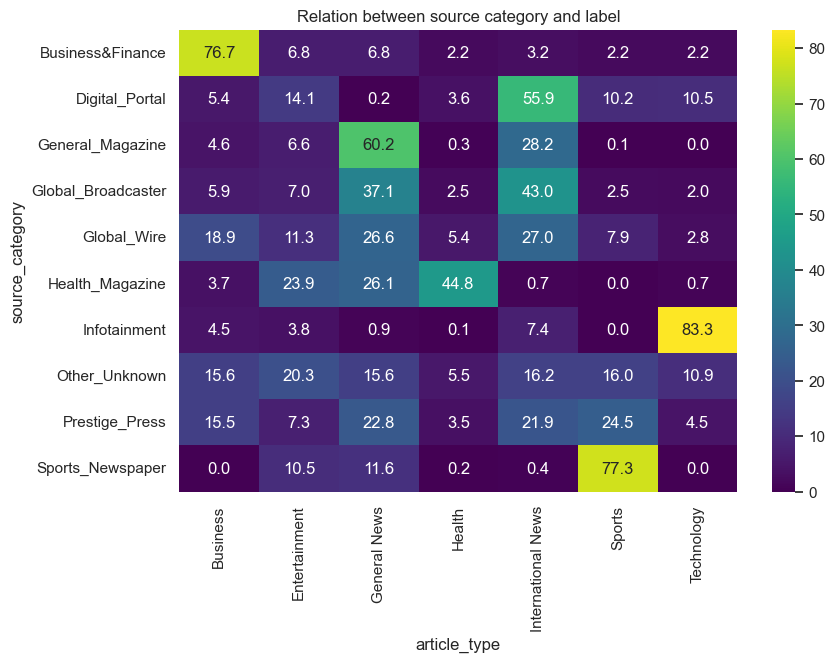

In [56]:

ct_sources = pd.crosstab(df['source_category'], df['article_type'], normalize='index') * 100

import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))
sns.heatmap(ct_sources, annot=True, fmt=".1f", cmap="viridis")
plt.title('Relation between source category and label')
plt.show()

In [57]:
df_clean = df.drop(columns=["title", "article", "article_type", "source", "page_rank", "source_clean"])

eval_clean = evaluation.drop(columns=["title", "article", "source", "page_rank", "source_clean"])

In [58]:
df_clean.shape

(79995, 9)

In [59]:
df_clean['full_content'] = df_clean['title_clean'].astype(str) + " " + df_clean['article_clean'].astype(str)
df_clean.drop(columns=["title_clean", "article_clean"], inplace=True)
eval_clean['full_content'] = eval_clean['title_clean'].astype(str) + " " + eval_clean['article_clean'].astype(str)
eval_clean.drop(columns=["title_clean", "article_clean"], inplace=True)

In [60]:
df_clean.head(1)

,label,is_null,is_adv,ts_is_missing,yr,mo,source_category,full_content
0,5,0,0,0,2004.0,9.0,Other_Unknown,opec boosts nigeria oil revenue bpd the organisation petroleum exporting countries opec hiking its official output one million barrels per day effective november with nigeria getting barrels per day per cent the new quota


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# SPLITTING DATASET

In [62]:
X_develop = df_clean.drop(columns=["label"])
y_develop = df_clean['label']
X_eval = eval_clean

X = df_clean.drop(columns=["label"])
y = df_clean['label']



X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42,  stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42,  stratify=y_temp)

In [63]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

def to_text(series):
    return series.squeeze().astype(str)

preprocess = ColumnTransformer(
    transformers=[
        (
            "tfidf",
            Pipeline(steps=[
                ("selector", FunctionTransformer(to_text, validate=False)),
                ("tfidf", TfidfVectorizer(                    
                    ngram_range=(1,2),
                     min_df = 5,
                     max_df = 0.85,                              
                    
                    
                    stop_words="english"
                    
                ))
            ]),
            ["full_content"]
        ),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['yr', 'mo', 'source_category'])
             
    ], remainder="passthrough"
    
)

In [65]:
X_train_tfidf = preprocess.fit_transform(X_train)
X_val_tfidf = preprocess.transform(X_val)
X_test_tfidf = preprocess.transform(X_test)

In [66]:
X_train_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1822029 stored elements and shape (63996, 44761)>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import LinearSVC



In [68]:
model_svc = LinearSVC(max_iter=2000, random_state=42)

model_svc.fit(X_train_tfidf, y_train)

# 3. Valutazione sul Validation Set
y_val_pred = model_svc.predict(X_val_tfidf)

print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73      2354
           1       0.73      0.78      0.75      1058
           2       0.80      0.81      0.80      1116
           3       0.59      0.50      0.54       998
           4       0.81      0.90      0.85       858
           5       0.51      0.43      0.47      1305
           6       0.66      0.63      0.64       310

    accuracy                           0.69      7999
   macro avg       0.69      0.69      0.68      7999
weighted avg       0.68      0.69      0.69      7999



In [69]:
model_lgr = LogisticRegression(
    max_iter=2000,    
    class_weight="balanced",
    multi_class='ovr', 
    random_state=42,
    n_jobs=-1,
    C=1,    
)

model_lgr.fit(X_train_tfidf, y_train)

# 3. Valutazione sul Validation Set
y_val_pred = model_lgr.predict(X_val_tfidf)

print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.76      0.71      0.73      2354
           1       0.71      0.82      0.76      1058
           2       0.80      0.82      0.81      1116
           3       0.59      0.55      0.57       998
           4       0.80      0.93      0.86       858
           5       0.56      0.48      0.52      1305
           6       0.59      0.80      0.68       310

    accuracy                           0.71      7999
   macro avg       0.69      0.73      0.70      7999
weighted avg       0.70      0.71      0.70      7999



In [70]:
tfidf = preprocess.named_transformers_["tfidf"].named_steps["tfidf"]
feature_names = np.array(tfidf.get_feature_names_out())
n_tfidf = len(feature_names)
X_train_all = X_train_tfidf

for label in model_lgr.classes_:
    mask = (y_train == label).to_numpy()

    
    X_label_tfidf = X_train_all[mask][:, :n_tfidf]

    word_scores = np.asarray(X_label_tfidf.sum(axis=0)).ravel()

    top10_idx = np.argsort(word_scores)[-30:][::-1]
    top10_words = feature_names[top10_idx]

    print(f"\nTop 30 MOST USED (TF-IDF) words for label {article_map[label]}:")
    print(", ".join(top10_words))


Top 30 MOST USED (TF-IDF) words for label International News:
afp, yahoo, reuters, said, afp afp, iraq, rss, news, president, dailynews, yahoo dailynews, news yahoo, dailynews rss, world, bush, new, minister, police, killed, government, europe, people, says, rss world, tuesday, world news, monday, wednesday, year, yahoo afp

Top 30 MOST USED (TF-IDF) words for label Business:
reuters, fool, foolwatch, usmf, usmf foolwatch, fool usmf, feeds fool, new, oil, feeds, said, company, stocks, profit, percent, foolwatch feeds, york, new york, billion, sales, business, prices, corp, york reuters, market, shares, quarter, year, stock, economy

Top 30 MOST USED (TF-IDF) words for label Technology:
computerworld, pcworld, feeds, microsoft, new, news, computerworld news, computerworld computerworld, feeds computerworld, wired, news feeds, pcworld latestnews, latestnews, internet, feeds pcworld, pcworld pcworld, yahoo, software, web, latestnews feeds, space, company, apple, adlog, mobile, said, site

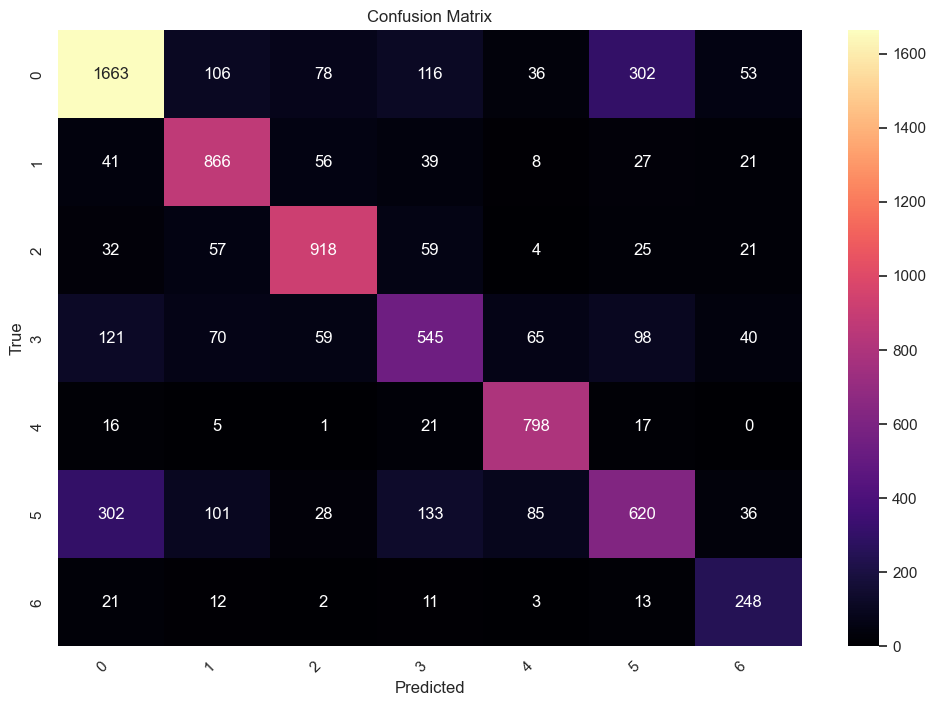

In [71]:
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='magma',
            xticklabels=model_lgr.classes_, 
            yticklabels=model_lgr.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45, ha='right')
plt.show()

In [74]:
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import f1_score

In [75]:
param_grid_sv = {
    "C": [0.1, 0.3, 0.5, 0.7, 1.0, 2.0],
    "loss": ["hinge", "squared_hinge"],
    
}

best_score_sv = -1
best_params_sv = None
best_model_sv = None
scores_sv = []

for config_sv in ParameterGrid(param_grid_sv):
    
    model_grid_sv = LinearSVC(
        **config_sv,
        max_iter=2000,
        random_state=42,
        class_weight="balanced"
    )
    
    model_grid_sv.fit(X_train_tfidf, y_train)
    y_val_pred = model_grid_sv.predict(X_val_tfidf)

    score_sv = f1_score(y_val, y_val_pred, average="macro")
    scores_sv.append(score_sv)

    print(f"{config_sv} -> Macro-F1 (val): {score_sv:.4f}")

    if score_sv > best_score_sv:
        best_score_sv = score_sv
        best_params_sv = config_sv
        best_model_sv = model_grid_sv

print("\nBEST CONFIG:")
print(best_params_sv)
print("BEST Macro-F1 (val):", best_score_sv)

{'C': 0.1, 'loss': 'hinge'} -> Macro-F1 (val): 0.6687
{'C': 0.1, 'loss': 'squared_hinge'} -> Macro-F1 (val): 0.7025
{'C': 0.3, 'loss': 'hinge'} -> Macro-F1 (val): 0.6879
{'C': 0.3, 'loss': 'squared_hinge'} -> Macro-F1 (val): 0.7016
{'C': 0.5, 'loss': 'hinge'} -> Macro-F1 (val): 0.6907
{'C': 0.5, 'loss': 'squared_hinge'} -> Macro-F1 (val): 0.6979
{'C': 0.7, 'loss': 'hinge'} -> Macro-F1 (val): 0.6924
{'C': 0.7, 'loss': 'squared_hinge'} -> Macro-F1 (val): 0.6949
{'C': 1.0, 'loss': 'hinge'} -> Macro-F1 (val): 0.6892
{'C': 1.0, 'loss': 'squared_hinge'} -> Macro-F1 (val): 0.6846
{'C': 2.0, 'loss': 'hinge'} -> Macro-F1 (val): 0.6862
{'C': 2.0, 'loss': 'squared_hinge'} -> Macro-F1 (val): 0.6739

BEST CONFIG:
{'C': 0.1, 'loss': 'squared_hinge'}
BEST Macro-F1 (val): 0.7024924715685803


In [78]:
param_grid_lg = {
    "C": [0.7, 0.8, 0.9, 1.0, 2.0, 3.0],
    "penalty": ["l2"],
    "solver": ["lbfgs"],
    "multi_class": ["multinomial", "ovr"],
    
}

best_score_lg= -1
best_params_lg = None
best_model_lg = None
scores_lg = []

for config_lg in ParameterGrid(param_grid_lg):
    model_grid_lg = LogisticRegression(
        **config_lg,
        max_iter=2000,
        class_weight="balanced",
        random_state=42
    )

    model_grid_lg.fit(X_train_tfidf, y_train)
    y_val_pred = model_grid_lg.predict(X_val_tfidf)

    score_lg = f1_score(y_val, y_val_pred, average="macro")

    print(f"{config_lg} -> Macro-F1 (val): {score_lg:.4f}")

    scores_lg.append(score_lg)    
    if score_lg > best_score_lg:
        best_score_lg = score_lg
        best_params_lg = config_lg
        best_model_lg = model_grid_lg

print("\nBEST CONFIG:")
print(best_params_lg)
print("BEST Macro-F1 (val):", best_score_lg)

{'C': 0.7, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'} -> Macro-F1 (val): 0.6976
{'C': 0.7, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'lbfgs'} -> Macro-F1 (val): 0.7009
{'C': 0.8, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'} -> Macro-F1 (val): 0.6989
{'C': 0.8, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'lbfgs'} -> Macro-F1 (val): 0.7032
{'C': 0.9, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'} -> Macro-F1 (val): 0.6994
{'C': 0.9, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'lbfgs'} -> Macro-F1 (val): 0.7043
{'C': 1.0, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'} -> Macro-F1 (val): 0.6997
{'C': 1.0, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'lbfgs'} -> Macro-F1 (val): 0.7039
{'C': 2.0, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'} -> Macro-F1 (val): 0.6984
{'C': 2.0, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'lbfgs'} -> Macro-F1 (val): 0.7031
{'C': 3.0,

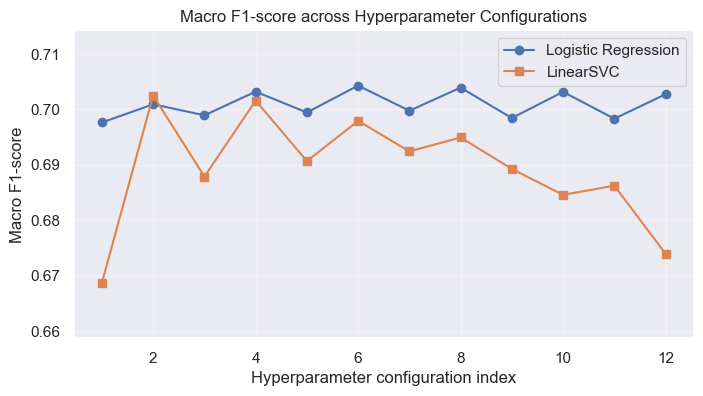

In [79]:
def plot_f1_runs_zoom(logreg_scores, svc_scores, pad=0.01):
    all_scores = scores_lg + scores_sv
    y_min = min(all_scores) - pad
    y_max = max(all_scores) + pad

    plt.figure(figsize=(8, 4))
    plt.plot(range(1, len(scores_lg) + 1), scores_lg, marker="o", label="Logistic Regression")
    plt.plot(range(1, len(scores_sv) + 1), scores_sv, marker="s", label="LinearSVC")

    plt.xlabel("Hyperparameter configuration index")
    plt.ylabel("Macro F1-score")
    plt.title("Macro F1-score across Hyperparameter Configurations")
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.ylim(y_min, y_max)   # <-- zoom automatico
    plt.show()

plot_f1_runs_zoom(scores_lg, scores_sv)

In [80]:
X_trainval = pd.concat((X_train, X_val))
y_trainval = pd.concat((y_train, y_val))

In [81]:
X_trainval_idf = preprocess.fit_transform(X_trainval)
X_test_idf = preprocess.transform(X_test)

In [82]:
model_def_lg = LogisticRegression(
    **best_params_lg,
    random_state=42,
    max_iter=2000,
    class_weight="balanced"
)

model_def_lg.fit(X_trainval_idf, y_trainval)


y_test_pred_lg = model_def_lg.predict(X_test_idf)

print(classification_report(y_pred=y_test_pred_lg, y_true=y_test))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73      2355
           1       0.74      0.81      0.78      1059
           2       0.79      0.82      0.81      1116
           3       0.56      0.51      0.54       997
           4       0.78      0.93      0.85       857
           5       0.54      0.49      0.51      1306
           6       0.61      0.85      0.71       310

    accuracy                           0.70      8000
   macro avg       0.68      0.73      0.70      8000
weighted avg       0.70      0.70      0.70      8000



In [83]:
model_def_svc = LinearSVC(**best_params_sv, random_state=42, class_weight="balanced", max_iter=2000)

model_def_svc.fit(X_trainval_idf, y_trainval)
y_test_pred_svc = model_def_svc.predict(X_test_idf)
print(classification_report(y_pred=y_test_pred_svc, y_true=y_test))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74      2355
           1       0.73      0.83      0.78      1059
           2       0.79      0.84      0.81      1116
           3       0.63      0.49      0.55       997
           4       0.76      0.96      0.85       857
           5       0.58      0.47      0.52      1306
           6       0.57      0.88      0.69       310

    accuracy                           0.71      8000
   macro avg       0.69      0.74      0.71      8000
weighted avg       0.71      0.71      0.71      8000



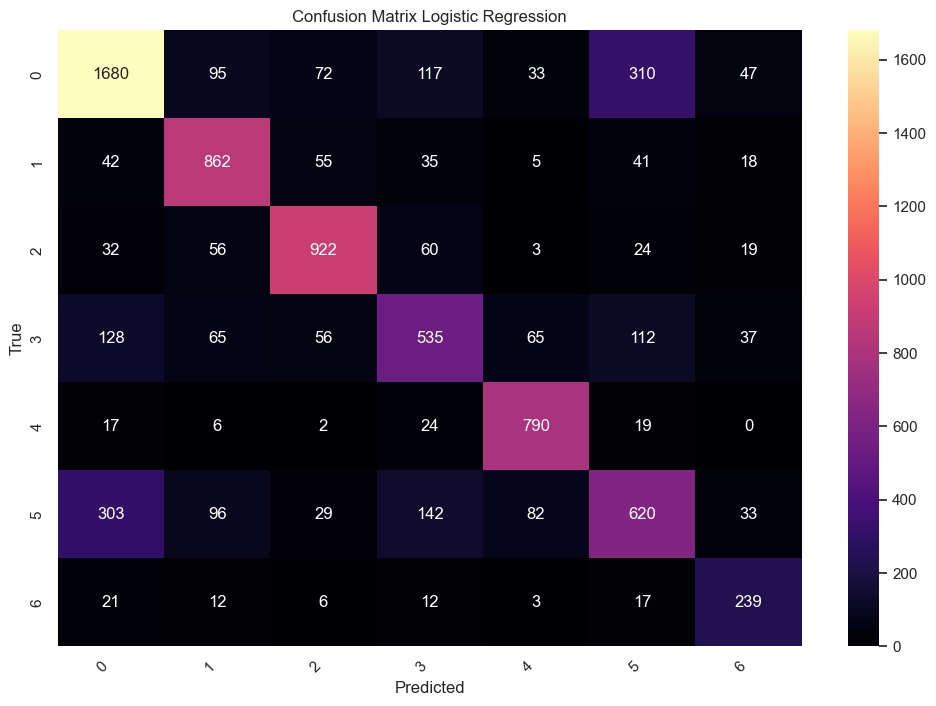

In [84]:
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='magma',
            xticklabels=model_def_lg.classes_, 
            yticklabels=model_def_lg.classes_)
plt.title('Confusion Matrix Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45, ha='right')
plt.show()

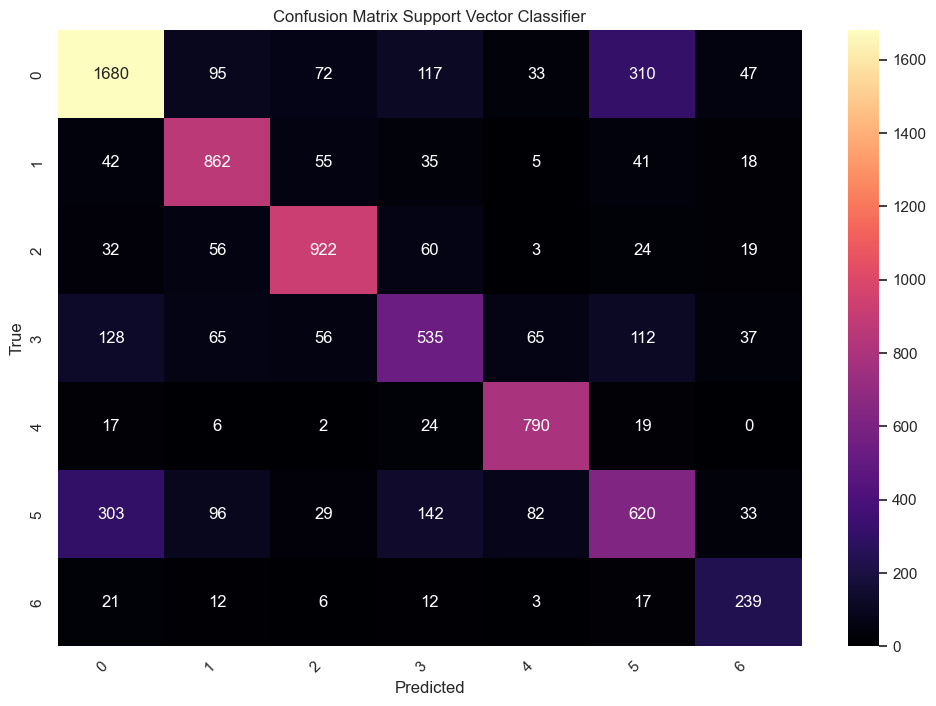

In [85]:
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='magma',
            xticklabels=model_def_svc.classes_, 
            yticklabels=model_def_svc.classes_)
plt.title('Confusion Matrix Support Vector Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45, ha='right')
plt.show()

In [86]:
X_develop_tfidf = preprocess.fit_transform(X_develop)
X_eval_tfidf = preprocess.transform(X_eval)

In [87]:
model_def_lg.fit(X_develop_tfidf, y_develop)
y_eval_pred_lg = model_def_lg.predict(X_eval_tfidf)

model_def_svc.fit(X_develop_tfidf, y_develop)
y_eval_pred_svc = model_def_svc.predict(X_eval_tfidf)

In [88]:
submissionlg = pd.DataFrame({
    "Id": evaluation.index, 
    "Predicted": y_eval_pred_lg
})

submissionsvc = pd.DataFrame({
    "Id": evaluation.index, 
    "Predicted": y_eval_pred_svc
})

In [89]:
submissionlg.to_csv("submission_lg.csv", index=False)
submissionsvc.to_csv("sumbission_svc.csv", index=False)

